In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

1. Чтение данных из train

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


2. Разбивка данных на тренировочные и валидные

In [5]:
from sklearn.model_selection import train_test_split

In [88]:
data_train, data_valid = train_test_split(data, test_size=0.2, random_state=42)

In [89]:
data_train.shape, data_valid.shape

((8000, 20), (2000, 20))

3. Просмотр тренировочного датасета на предмет выбросов, некорректных данных

In [90]:
data_train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9254  12473          58    1.0  65.271225   62.798045            1.0      3   
1561  14050         146    2.0  45.091598   43.816601            1.0      5   
1670   3779           5    1.0  34.463114   20.561823            5.0      3   
6087   3762          90    3.0  61.931107   46.126389            5.0      4   
6669    358           1    1.0  42.670840         NaN            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
9254         1.0       1977   0.437885         B         B        23   
1561        18.0       2017   0.236108         B         B        16   
1670         5.0       1960   0.150818         B         B        16   
6087         5.0       1966   0.265089         B         B        37   
6669        17.0       1977   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
9254      5735         3        1084.0            0        5       B   
1561      3893        27           NaN            3       10       B   
1670      3433         4        2643.0            4        5       B   
6087      5288         0        1937.0            3        2       B   
6669       264         0           NaN            0        1       B   

              Price  
9254  210849.693542  
1561  201549.998077  
1670  158433.168775  
6087  220194.818430  
6669  125834.270291

In [91]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 20 columns):
Id               8000 non-null int64
DistrictId       8000 non-null int64
Rooms            8000 non-null float64
Square           8000 non-null float64
LifeSquare       6299 non-null float64
KitchenSquare    8000 non-null float64
Floor            8000 non-null int64
HouseFloor       8000 non-null float64
HouseYear        8000 non-null int64
Ecology_1        8000 non-null float64
Ecology_2        8000 non-null object
Ecology_3        8000 non-null object
Social_1         8000 non-null int64
Social_2         8000 non-null int64
Social_3         8000 non-null int64
Healthcare_1     4148 non-null float64
Helthcare_2      8000 non-null int64
Shops_1          8000 non-null int64
Shops_2          8000 non-null object
Price            8000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.3+ MB


Замечание 1: столбец Healthcare_1 имеет почти половину пропущенных данных - от этого столбца можно избавится - он не несет полезной информации для построения модели. Столбец LifeSquare имеет пропущенные значения, но существенно меньше чем Healthcare_1, поэтому имеет смысл заполнить пропуски разницей между Square и KitchenSquare

In [92]:
data_train = data_train.reset_index(drop=True)
data_valid = data_valid.reset_index(drop=True)

In [11]:
import seaborn as sns

In [12]:
X_corr_before = data_train.corr()

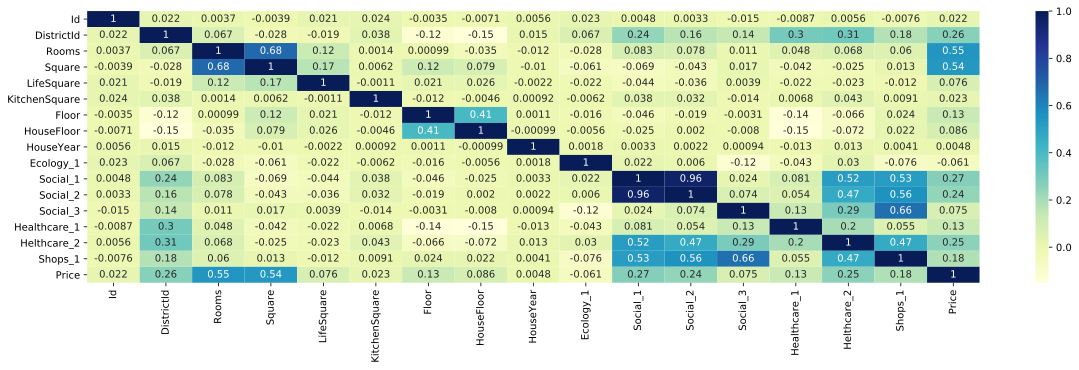

In [13]:
plt.rcParams['figure.figsize']=(20,5)
sns.heatmap(X_corr_before, annot=True, cmap='YlGnBu')

In [13]:
# отрисовка выбросных точек по выбранному порогу и/или условию
def scatterplot(x, y, mark, threshold0, threshold1, mark1, x_label, y_label):

# x - данные для оси x 
# y - данные для оси y
# mark - 0 условие по порогу на x, 1 условие по порогу на y
# threshold0 - нижний порог
# threshold1 - верхний порог
# mark1 - 0 условие на x<=y, 1 условие на x>=y, 2 условия нет
# x_label - подпись оси x
# y_label - подпись оси y

    fig, ax = plt.subplots()
    mask = (mark==0 and x <threshold0) | (mark==0 and x > threshold1) | (mark==1 and y < threshold0) | (mark==1 and y > threshold1) | (mark1==0 and x<y) | (mark1==1 and x>y)
    x1, y1 = x[~mask], y[~mask]
    x2, y2 = x[mask], y[mask]
    ax.scatter(x1,y1,color='c')
    ax.scatter(x2,y2,color='r')
    ax.set_title(f'Выбросных точек {y2.count()}')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    return

Замечание 2: проверим столбцы Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear на предмет адекватности данных:
1. Rooms должно быть больше 0, но меньше 6
2. Square больше 14, но меньше (max(Square)+min(Square))/2 - по всей выборке
3. LifeSquare больше 8, но меньше (max(LifeSquare)+min(LifeSquare))/2 - по всей выборке и при условии, что Square > LifeSquare
4. KitchenSquare больше 6, но меньше (max(KitchenSquare)+min(KitchenSquare))/2 - по всей выборке и при условии, что Square > KitchenSquare
5. Floor должен быть меньше чем HouseFloor
6. HouseFloor больше 0, но меньше 69
7. HouseYear больше 1920, но меньше 2020

#### Rooms

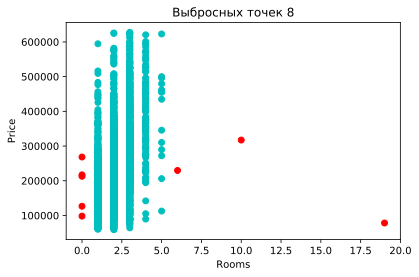

In [14]:
scatterplot(data_train['Rooms'],data_train['Price'], 0, 1, 5, 2,'Rooms','Price')
plt.show()

In [15]:
data_train.loc[(data_train['Rooms']>=6) | (data_train['Rooms']<=0),:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1473   8491           1   19.0   42.006046   21.779288            7.0     17   
1717    456           6    0.0   81.491446         NaN            0.0      4   
2176  14003          99    6.0   59.414334   38.702244            6.0      7   
2464  12638          27    0.0  138.427694  136.215499            0.0      4   
5069   7317          27    0.0   41.790881         NaN            0.0     13   
5803   5927          57   10.0   59.056975   36.223072           10.0     22   
6499    770          28    0.0   49.483501         NaN            0.0     16   
6843   3224          27    0.0    2.377248    0.873147            0.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1473        17.0       2014   0.007122         B         B         1   
1717         0.0       1977   0.243205         B         B         5   
2176         9.0       1969   0.033494         B         B        66   
2464         3.0       2016   0.075424         B         B        11   
5069         0.0       1977   0.211401         B         B         9   
5803        22.0       2002   0.090799         B         B        74   
6499         0.0       2015   0.118537         B         B        30   
6843         0.0       1977   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1473       264         0           NaN            0        1       B   
1717      1564         0         540.0            0        0       B   
2176     10573         1        1322.0            3        8       B   
2464      3097         0           NaN            0        0       B   
5069      1892         0           NaN            0        1       B   
5803     19083         2           NaN            5       15       B   
6499      6207         1        1183.0            1        0       B   
6843       469         0           NaN            0        0       B   

              Price  
1473   78364.616704  
1717  212864.799112  
2176  229661.964416  
2464  268394.744389  
5069   98129.976788  
5803  317265.323792  
6499  217009.338463  
6843  126596.941798

In [16]:
data_train.loc[(data_train['Rooms']>=6) | (data_train['Rooms']<=0),'Rooms'].count()

8

#### Square

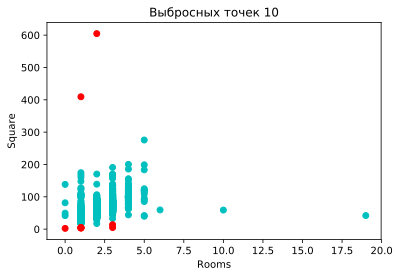

In [17]:
scatterplot(data_train['Rooms'],data_train['Square'], 1, 14, (data['Square'].max() + data['Square'].min())/2, 2, 'Rooms', 'Square')
plt.show()

In [18]:
data_train.loc[(data_train['Square']>=(data['Square'].max() + data['Square'].min())/2) | (data_train['Square']<14),:]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1492     28           9    2.0  604.705972         NaN            1.0     17   
1554   9487           5    1.0    5.129222    5.549458            1.0      1   
1873  10527          27    1.0    4.380726   40.805837            1.0     10   
2675  13265           1    3.0    4.823679   79.767964            0.0      6   
3693  12676          81    3.0   13.784865   15.988889            7.0      4   
3825   2307         102    1.0  409.425181  410.639749           10.0      4   
6187   7657          38    1.0    4.502784    4.618547            1.0     28   
6254  11526          27    1.0    4.633498    1.969969            1.0     18   
6843   3224          27    0.0    2.377248    0.873147            0.0      1   
7036   6782          45    1.0    2.954309    5.257278            1.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1492        18.0       1977   0.161532         B         B        25   
1554         1.0       1977   0.150818         B         B        16   
1873        17.0       2013   0.211401         B         B         9   
2675        17.0       1977   0.007122         B         B         1   
3693         5.0       1960   0.319809         B         B        25   
3825         4.0       2016   0.238617         B         B        26   
6187         1.0       1977   0.060753         B         B        15   
6254         1.0       1977   0.011654         B         B         4   
6843         0.0       1977   0.017647         B         B         2   
7036         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1492      5648         1          30.0            2        4       B   
1554      3433         4        2643.0            4        5       B   
1873      1892         0           NaN            0        1       B   
2675       264         0           NaN            0        1       B   
3693      4756        16        2857.0            5        8       B   
3825      3889         6         705.0            3        6       B   
6187      2787         2         520.0            0        7       B   
6254       915         0           NaN            0        0       B   
6843       469         0           NaN            0        0       B   
7036      5212         6           NaN            3        2       B   

              Price  
1492  187717.242538  
1554  369472.403061  
1873   97560.720383  
2675  237716.681261  
3693   78388.806186  
3825   90470.430830  
6187  483283.488083  
6254  107604.269441  
6843  126596.941798  
7036  438005.182323

In [19]:
data_train.loc[(data_train['Square']>=(data['Square'].max() + data['Square'].min())/2) | (data_train['Square']<14),'Square'].count()

10

#### LifeSquare

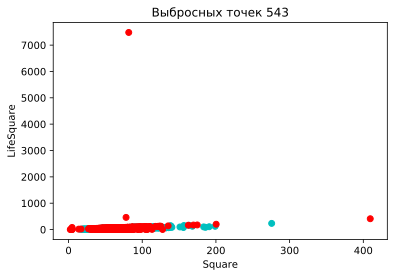

In [20]:
scatterplot(data_train['Square'],data_train['LifeSquare'], 1, 8, (data['LifeSquare'].max() + data['LifeSquare'].min())/2, 0, 'Square', 'LifeSquare')
plt.show()

In [21]:
data_train.loc[(data_train['LifeSquare'].isnull()) | (data_train['LifeSquare']<8) | (data_train['LifeSquare']>(data['LifeSquare'].max() + data['LifeSquare'].min())/2) | (data_train['LifeSquare']>data_train['Square']),:].head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4     358           1    1.0  42.670840         NaN            1.0      8   
5    6519          94    2.0  50.392833    3.249569            1.0      4   
6    6076          27    1.0  48.599513         NaN            1.0      8   
7   12584          23    1.0  41.515204         NaN            1.0     12   
8    4144          23    1.0  42.705836         NaN            0.0      5   
9   15303          48    3.0  83.866174         NaN            1.0     26   
14   7005          27    2.0  70.986230         NaN            1.0      5   
16   1273          45    2.0  63.193038         NaN            1.0     17   
17   6793          27    1.0  43.108815         NaN            1.0     11   
20  15165          74    2.0  83.259565    5.387263            1.0     12   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
4         17.0       1977   0.007122         B         B         1       264   
5         12.0       1973   0.521867         B         B        25      6149   
6          1.0       1977   0.072158         B         B         2       629   
7         25.0       1977   0.075779         B         B         6      1437   
8          4.0       1977   0.034656         B         B         0       168   
9          1.0       2014   0.041125         B         B        46      9515   
14        16.0       1977   0.011654         B         B         4       915   
16         1.0       1977   0.195781         B         B        23      5212   
17        17.0       1977   0.211401         B         B         9      1892   
20         1.0       2017   0.309479         B         B        35      7715   

    Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
4          0           NaN            0        1       B  125834.270291  
5          0           NaN            0        0       B  157822.338178  
6          1           NaN            0        0       A  159768.113188  
7          3           NaN            0        2       B  118200.065926  
8          0           NaN            0        0       B   92290.968476  
9          5           NaN            1       10       B  468595.039049  
14         0           NaN            0        0       B  162798.640150  
16         6           NaN            3        2       B  312636.073081  
17         0           NaN            0        1       B   99530.021887  
20         4         990.0            0        6       B  260852.230977

In [22]:
data_train.loc[(data_train['LifeSquare'].isnull()) | (data_train['LifeSquare']<8) | (data_train['LifeSquare']>(data['LifeSquare'].max() + data['LifeSquare'].min())/2) | (data_train['LifeSquare']>data_train['Square']),'Id'].count()

2244

#### KitchenSquare

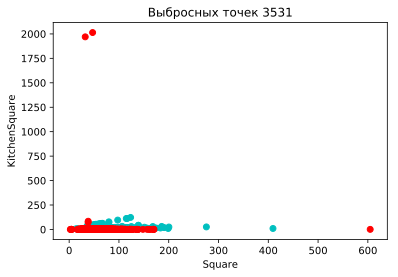

In [23]:
scatterplot(data_train['Square'],data_train['KitchenSquare'], 1, 6, (data['KitchenSquare'].max() + data['KitchenSquare'].min())/2, 0, 'Square','KitchenSquare')
plt.show()

In [24]:
data_train.loc[(data_train['KitchenSquare']>(data['KitchenSquare'].max() + data['KitchenSquare'].min())/2) | (data_train['KitchenSquare']<6) | (data_train['Square']<data_train['KitchenSquare']),:].head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  12473          58    1.0  65.271225   62.798045            1.0      3   
1  14050         146    2.0  45.091598   43.816601            1.0      5   
2   3779           5    1.0  34.463114   20.561823            5.0      3   
3   3762          90    3.0  61.931107   46.126389            5.0      4   
4    358           1    1.0  42.670840         NaN            1.0      8   
5   6519          94    2.0  50.392833    3.249569            1.0      4   
6   6076          27    1.0  48.599513         NaN            1.0      8   
7  12584          23    1.0  41.515204         NaN            1.0     12   
8   4144          23    1.0  42.705836         NaN            0.0      5   
9  15303          48    3.0  83.866174         NaN            1.0     26   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         1.0       1977   0.437885         B         B        23      5735   
1        18.0       2017   0.236108         B         B        16      3893   
2         5.0       1960   0.150818         B         B        16      3433   
3         5.0       1966   0.265089         B         B        37      5288   
4        17.0       1977   0.007122         B         B         1       264   
5        12.0       1973   0.521867         B         B        25      6149   
6         1.0       1977   0.072158         B         B         2       629   
7        25.0       1977   0.075779         B         B         6      1437   
8         4.0       1977   0.034656         B         B         0       168   
9         1.0       2014   0.041125         B         B        46      9515   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         3        1084.0            0        5       B  210849.693542  
1        27           NaN            3       10       B  201549.998077  
2         4        2643.0            4        5       B  158433.168775  
3         0        1937.0            3        2       B  220194.818430  
4         0           NaN            0        1       B  125834.270291  
5         0           NaN            0        0       B  157822.338178  
6         1           NaN            0        0       A  159768.113188  
7         3           NaN            0        2       B  118200.065926  
8         0           NaN            0        0       B   92290.968476  
9         5           NaN            1       10       B  468595.039049

In [25]:
data_train.loc[(data_train['KitchenSquare']>(data['KitchenSquare'].max() + data['KitchenSquare'].min())/2) | (data_train['KitchenSquare']<6) | (data_train['Square']<data_train['KitchenSquare']),'KitchenSquare'].count()

3531

#### HouseFloor

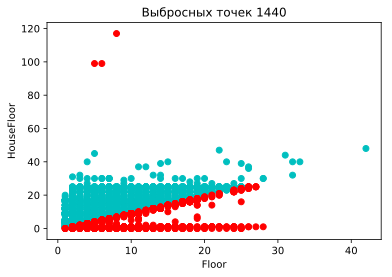

In [26]:
scatterplot(data_train['Floor'],data_train['HouseFloor'], 1, 1, 69, 1, 'Floor', 'HouseFloor')
plt.show()

In [27]:
data_train.loc[(data_train['HouseFloor']<1)| (data_train['HouseFloor']>69) | (data_train['HouseFloor']<data_train['Floor']),:].head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0   12473          58    1.0  65.271225   62.798045            1.0      3   
6    6076          27    1.0  48.599513         NaN            1.0      8   
8    4144          23    1.0  42.705836         NaN            0.0      5   
9   15303          48    3.0  83.866174         NaN            1.0     26   
16   1273          45    2.0  63.193038         NaN            1.0     17   
20  15165          74    2.0  83.259565    5.387263            1.0     12   
23  13670          22    1.0  87.485627         NaN            0.0     16   
35   8823           7    2.0  59.466919   33.746589            9.0     18   
38   3327         145    1.0  41.093702   20.643619            8.0     18   
41  13179          23    1.0  40.426157   22.346519            7.0     18   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0          1.0       1977   0.437885         B         B        23      5735   
6          1.0       1977   0.072158         B         B         2       629   
8          4.0       1977   0.034656         B         B         0       168   
9          1.0       2014   0.041125         B         B        46      9515   
16         1.0       1977   0.195781         B         B        23      5212   
20         1.0       2017   0.309479         B         B        35      7715   
23         0.0       1977   0.118537         B         B        30      6207   
35        16.0       2016   0.130618         B         B        39     10418   
38        17.0       1998   0.246032         B         A        22      3151   
41        17.0       2013   0.075779         B         B         6      1437   

    Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0          3        1084.0            0        5       B  210849.693542  
6          1           NaN            0        0       A  159768.113188  
8          0           NaN            0        0       B   92290.968476  
9          5           NaN            1       10       B  468595.039049  
16         6           NaN            3        2       B  312636.073081  
20         4         990.0            0        6       B  260852.230977  
23         1        1183.0            1        0       B  361744.269547  
35         9         900.0            1        9       B   71291.546163  
38         4        2715.0            3        3       B  174921.829928  
41         3           NaN            0        2       B   78213.740129

In [28]:
data_train.loc[(data_train['HouseFloor']<1)| (data_train['HouseFloor']>69) | (data_train['HouseFloor']<data_train['Floor']),'HouseFloor'].count()

1440

#### Floor

In [29]:
data_train.loc[data_train['Floor']>data_train['HouseFloor'],:].head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0   12473          58    1.0  65.271225   62.798045            1.0      3   
6    6076          27    1.0  48.599513         NaN            1.0      8   
8    4144          23    1.0  42.705836         NaN            0.0      5   
9   15303          48    3.0  83.866174         NaN            1.0     26   
16   1273          45    2.0  63.193038         NaN            1.0     17   
20  15165          74    2.0  83.259565    5.387263            1.0     12   
23  13670          22    1.0  87.485627         NaN            0.0     16   
35   8823           7    2.0  59.466919   33.746589            9.0     18   
38   3327         145    1.0  41.093702   20.643619            8.0     18   
41  13179          23    1.0  40.426157   22.346519            7.0     18   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0          1.0       1977   0.437885         B         B        23      5735   
6          1.0       1977   0.072158         B         B         2       629   
8          4.0       1977   0.034656         B         B         0       168   
9          1.0       2014   0.041125         B         B        46      9515   
16         1.0       1977   0.195781         B         B        23      5212   
20         1.0       2017   0.309479         B         B        35      7715   
23         0.0       1977   0.118537         B         B        30      6207   
35        16.0       2016   0.130618         B         B        39     10418   
38        17.0       1998   0.246032         B         A        22      3151   
41        17.0       2013   0.075779         B         B         6      1437   

    Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0          3        1084.0            0        5       B  210849.693542  
6          1           NaN            0        0       A  159768.113188  
8          0           NaN            0        0       B   92290.968476  
9          5           NaN            1       10       B  468595.039049  
16         6           NaN            3        2       B  312636.073081  
20         4         990.0            0        6       B  260852.230977  
23         1        1183.0            1        0       B  361744.269547  
35         9         900.0            1        9       B   71291.546163  
38         4        2715.0            3        3       B  174921.829928  
41         3           NaN            0        2       B   78213.740129

In [30]:
data_train.loc[data_train['Floor']>data_train['HouseFloor'],'Floor'].count()

1437

#### HouseYear

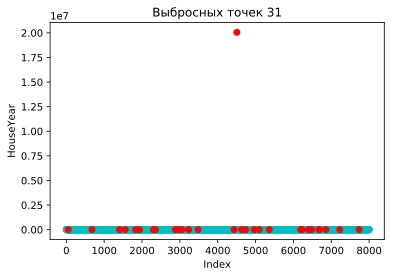

In [31]:
scatterplot(data_train.index, data_train['HouseYear'], 1, 1920, 2019, 2, 'Index', 'HouseYear')
plt.show()

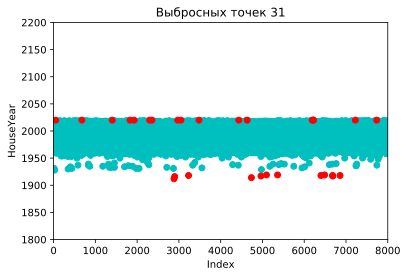

In [32]:
scatterplot(data_train.index, data_train['HouseYear'], 1, 1920, 2019, 2, 'Index', 'HouseYear')
plt.axis([0, 8000, 1800, 2200])
plt.show()

In [33]:
data_train.loc[(data_train['HouseYear']>2019) | (data_train['HouseYear']<1920),:].head(10)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
51     6915          53    3.0   77.214218   56.678434           12.0      6   
678    8433          45    2.0   82.880909   84.512719            1.0     19   
1405  15051          53    2.0   59.597891   44.869530           10.0      3   
1556  11607         147    2.0   44.791836   28.360393            5.0      4   
1830  14318          53    2.0   57.815313   37.287063            8.0      6   
1930   9303          53    2.0   57.126663   40.265100           10.0     11   
2300   6845         169    3.0   87.371123   64.905206           12.0      4   
2356   6731         120    2.0   85.087643   77.976325           10.0      7   
2883  14556         183    4.0  151.150660   98.187482           23.0      6   
2899   7920         183    3.0  102.964468   48.322107           14.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
51          24.0       2020   0.049637         B         B        34   
678         22.0       2020   0.195781         B         B        23   
1405        24.0       2020   0.049637         B         B        34   
1556         9.0       4968   0.319809         B         B        25   
1830        24.0       2020   0.049637         B         B        34   
1930        24.0       2020   0.049637         B         B        34   
2300        24.0       2020   0.178917         B         B        18   
2356        10.0       2020   0.341072         B         B        27   
2883         7.0       1912   0.037316         B         B        32   
2899         6.0       1916   0.037316         B         B        32   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
51        7759         0         229.0            1        3       B   
678       5212         6           NaN            3        2       B   
1405      7759         0         229.0            1        3       B   
1556      4756        16        2857.0            5        8       B   
1830      7759         0         229.0            1        3       B   
1930      7759         0         229.0            1        3       B   
2300      3594         4         192.0            1        5       B   
2356      5664        48        2300.0            3       11       B   
2883      6748        93         562.0            4       10       B   
2899      6748        93         562.0            4       10       B   

              Price  
51    338025.692848  
678   441850.464440  
1405  243114.222804  
1556  243028.603096  
1830  251249.365740  
1930  263206.223152  
2300  295304.011974  
2356  536020.260344  
2883  284884.959104  
2899  284608.939261

In [34]:
data_train.loc[(data_train['HouseYear']>2019) | (data_train['HouseYear']<1920),'HouseYear'].count()

31

In [35]:
data_train.groupby(['Rooms'], as_index=False)[['Square']].median()

Rooms      Square
0    0.0   49.483501
1    1.0   40.446514
2    2.0   55.883794
3    3.0   77.384916
4    4.0   98.385446
5    5.0  116.592852
6    6.0   59.414334
7   10.0   59.056975
8   19.0   42.006046

In [36]:
data_train.groupby(['Rooms'], as_index=False)[['KitchenSquare']].median()

Rooms  KitchenSquare
0    0.0            0.0
1    1.0            6.0
2    2.0            6.0
3    3.0            7.0
4    4.0            8.0
5    5.0            8.5
6    6.0            6.0
7   10.0           10.0
8   19.0            7.0

4. Функции для обработки данных

In [37]:
def clean_rooms(df):
    df.loc[df['Rooms'] <= 0, 'Rooms'] = 1
    df.loc[df['Rooms'] >= 6, 'Rooms'] = 2
    return df

In [38]:
def clean_square(df):
    stat = df.groupby(['Rooms'], as_index=False)[['Square']].median()
    i = df.loc[(df['Square'] < 14) | (df['Square'] > (data['Square'].max() + data['Square'].min())/2), 'Square'].index
    for j in i:
        k = df.loc[j, 'Rooms']
        df.loc[j, 'Square'] = stat.loc[stat['Rooms']==k, 'Square'].values
    return df

In [39]:
def clean_kitchensquare(df):
    stat = df.groupby(['Rooms'], as_index=False)[['KitchenSquare']].median()
    i = df.loc[(df['KitchenSquare'] > (data['KitchenSquare'].max() + data['KitchenSquare'].min())/2) | (df['KitchenSquare'] < 6) | (df['Square'] < df['KitchenSquare']), 'KitchenSquare'].index  
    for j in i:
        k = df.loc[j, 'Rooms']
        df.loc[j, 'KitchenSquare'] = stat.loc[stat['Rooms']==k, 'KitchenSquare'].values
    return df

In [40]:
def clean_lifesquare(df):
    stat = df.groupby(['Rooms'], as_index=False)[['KitchenSquare']].median()
    i = df.loc[(df['LifeSquare'].isnull()) | (df['LifeSquare'] > (data['LifeSquare'].max() + data['LifeSquare'].min())/2) | (df['LifeSquare'] < 8) | (df['LifeSquare'] > df['Square']) | (df['KitchenSquare'] > df['LifeSquare']), 'Id'].index
    for j in i:
        df.loc[j, 'LifeSquare'] = df.loc[j, 'Square'] - df.loc[j, 'KitchenSquare'] 
        if df.loc[j, 'LifeSquare'] < df.loc[j, 'KitchenSquare']:
            k = df.loc[j, 'Rooms']
            df.loc[j, 'KitchenSquare'] = stat.loc[stat['Rooms']==k, 'KitchenSquare'].values
            df.loc[j, 'LifeSquare'] = df.loc[j, 'Square'] - df.loc[j, 'KitchenSquare'] 
    return df

In [41]:
def clean_housefloor(df):
    i = df.loc[(df['HouseFloor'] < 1) | (df['HouseFloor']<df['Floor']), 'HouseFloor'].index
    df.loc[df['HouseFloor'] > 69, 'HouseFloor'] = 69
    for j in i:
        df.loc[j, 'HouseFloor'] = df.loc[j, 'Floor']
    return df

In [42]:
def clean_floor(df):
    i = df.loc[(df['Floor'] < 1) | (df['Floor'] > 69), 'Floor'].index
    for j in i:
        df.loc[j, 'Floor'] = df.loc[j, 'HouseFloor']
    return df

In [43]:
def clean_houseyear(df):
    df.loc[df['HouseYear'] < 1920, 'HouseYear'] = df['HouseYear'].median()
    df.loc[df['HouseYear'] > 2019, 'HouseYear'] = 2019
    return df

In [85]:
stat = data_train.groupby('Rooms', as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})
stat

Rooms     mean_price
0    1.0  159669.242728
1    2.0  215350.234575
2    3.0  290307.800100
3    4.0  379696.668310
4    5.0  388703.752080

In [46]:
mean_price = data_train['Price'].mean()
mean_price

214094.17858887714

In [86]:
def add_mean_price(df, stat, mean_price):
    df = pd.merge(df, stat, on='Rooms', how='left')    
    df['mean_price'] = df['mean_price'].fillna(mean_price)
    return df

In [48]:
def del_Healthcare_1(df):
    df = df.drop('Healthcare_1',axis=1)
    return df

In [49]:
def dummy_df(df):
    df = pd.get_dummies(df)
    return df

In [87]:
def prepare_data(df, stat1=stat, mean_price=mean_price):
    df = clean_rooms(df)
    df = clean_square(df)
    df = clean_kitchensquare(df)
    df = clean_lifesquare(df)
    df = clean_housefloor(df)
    df = clean_floor(df)
    df = clean_houseyear(df)
    df = add_mean_price(df, stat, mean_price)
    df = del_Healthcare_1(df)
    df = dummy_df(df)
    return df

5. Применение функций на трейне и валиде

In [93]:
data_train = prepare_data(data_train)

In [94]:
data_train.shape

(8000, 23)

In [95]:
data_train.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean    8365.521625    50.493625     1.886125    56.196891    40.370733   
std     4865.821409    43.691588     0.809777    18.972161    18.493477   
min        0.000000     0.000000     1.000000    16.117154     8.822988   
25%     4154.750000    20.000000     1.000000    41.748189    27.145585   
50%     8369.500000    36.000000     2.000000    52.560001    35.826720   
75%    12555.500000    75.000000     2.000000    65.931541    48.968011   
max    16796.000000   209.000000     5.000000   275.645284   233.949309   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean        7.639188     8.492375    13.435625  1985.050375     0.117770   
std         3.023035     5.221240     5.959031    18.181004     0.118239   
min         6.000000     1.000000     1.000000  1928.000000     0.000000   
25%         6.000000     4.000000     9.000000  1974.000000     0.017647   
50%         7.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2001.000000     0.195781   
max       112.000000    42.000000    69.000000  2019.000000     0.521867   

          Social_1      Social_2     Social_3  Helthcare_2      Shops_1  \
count  8000.000000   8000.000000  8000.000000  8000.000000  8000.000000   
mean     24.729125   5358.405125     8.006500     1.313375     4.246375   
std      17.609415   4016.879776    23.720008     1.489362     4.806018   
min       0.000000    168.000000     0.000000     0.000000     0.000000   
25%       6.000000   1564.000000     0.000000     0.000000     1.000000   
50%      25.000000   5285.000000     2.000000     1.000000     3.000000   
75%      36.000000   7287.000000     5.000000     2.000000     6.000000   
max      74.000000  19083.000000   141.000000     6.000000    23.000000   

               Price     mean_price  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
count    8000.000000    8000.000000  8000.000000  8000.000000  8000.000000   
mean   214094.178589  214094.178589     0.009375     0.990625     0.028125   
std     92671.160116   53392.351740     0.096376     0.096376     0.165340   
min     59174.778028  159669.242728     0.000000     0.000000     0.000000   
25%    153996.751273  159669.242728     0.000000     1.000000     0.000000   
50%    192152.769521  215350.234575     0.000000     1.000000     0.000000   
75%    249135.462171  215350.234575     0.000000     1.000000     0.000000   
max    627525.072788  388703.752080     1.000000     1.000000     1.000000   

       Ecology_3_B    Shops_2_A    Shops_2_B  
count  8000.000000  8000.000000  8000.000000  
mean      0.971875     0.083125     0.916875  
std       0.165340     0.276088     0.276088  
min       0.000000     0.000000     0.000000  
25%       1.000000     0.000000     1.000000  
50%       1.000000     0.000000     1.000000  
75%       1.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000

In [96]:
data_valid = prepare_data(data_valid)

In [97]:
data_valid.shape

(2000, 23)

In [98]:
data_valid.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    8454.952000    50.029500     1.893500    56.336357    40.481431   
std     4832.263183    43.177955     0.818225    19.452642    19.248356   
min        6.000000     0.000000     1.000000    16.547242     8.547242   
25%     4212.750000    20.000000     1.000000    41.877078    27.302975   
50%     8516.000000    35.000000     2.000000    52.300299    35.480723   
75%    12720.000000    74.000000     2.000000    65.823051    49.013765   
max    16798.000000   208.000000     5.000000   212.932361   211.231125   

       KitchenSquare       Floor   HouseFloor    HouseYear    Ecology_1  \
count    2000.000000  2000.00000  2000.000000  2000.000000  2000.000000   
mean        7.610500     8.66400    13.382000  1984.635000     0.123206   
std         2.461264     5.31914     5.967066    18.323964     0.122054   
min         6.000000     1.00000     1.000000  1929.000000     0.000000   
25%         6.000000     4.00000     9.000000  1973.000000     0.019509   
50%         7.000000     8.00000    14.000000  1977.000000     0.075779   
75%         9.000000    12.00000    17.000000  2001.000000     0.200147   
max        60.000000    37.00000    48.000000  2019.000000     0.521867   

          Social_1      Social_2     Social_3  Helthcare_2      Shops_1  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     24.518500   5327.166500     8.170000     1.344000     4.171000   
std      17.225302   3967.122324    24.279762     1.510564     4.808359   
min       0.000000    168.000000     0.000000     0.000000     0.000000   
25%       6.000000   1564.000000     0.000000     0.000000     1.000000   
50%      25.000000   5285.000000     2.000000     1.000000     3.000000   
75%      35.000000   7065.000000     4.250000     2.000000     5.000000   
max      74.000000  19083.000000   141.000000     6.000000    23.000000   

               Price     mean_price  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
count    2000.000000    2000.000000  2000.000000  2000.000000  2000.000000   
mean   214317.572638  214653.940817     0.011000     0.989000     0.025000   
std     93695.624345   54073.855217     0.104329     0.104329     0.156164   
min     60502.583500  159669.242728     0.000000     0.000000     0.000000   
25%    153360.983329  159669.242728     0.000000     1.000000     0.000000   
50%    193026.691821  215350.234575     0.000000     1.000000     0.000000   
75%    248875.567286  215350.234575     0.000000     1.000000     0.000000   
max    633233.466570  388703.752080     1.000000     1.000000     1.000000   

       Ecology_3_B    Shops_2_A    Shops_2_B  
count  2000.000000  2000.000000  2000.000000  
mean      0.975000     0.080000     0.920000  
std       0.156164     0.271361     0.271361  
min       0.000000     0.000000     0.000000  
25%       1.000000     0.000000     1.000000  
50%       1.000000     0.000000     1.000000  
75%       1.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000

In [99]:
X_corr_past = data_train.corr()

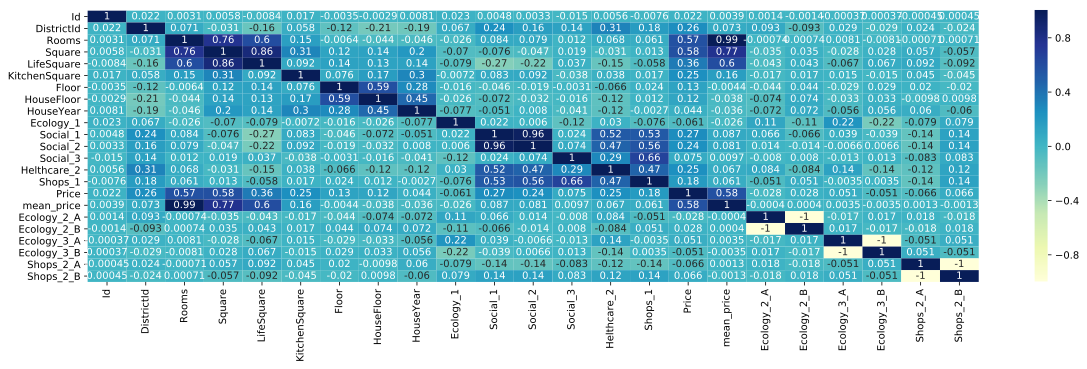

In [100]:
plt.rcParams['figure.figsize']=(20,5)
sns.heatmap(X_corr_past, annot=True, cmap='YlGnBu')

6. Модель

In [101]:
from sklearn.ensemble import RandomForestRegressor as RF

In [102]:
model = RF(n_estimators=30, max_depth=12, random_state=42)

In [103]:
from sklearn.metrics import r2_score as r2

In [104]:
feats = ['DistrictId','Rooms', 'Square','LifeSquare','KitchenSquare','Floor','HouseFloor','Social_1','Social_2','Helthcare_2','Shops_1','mean_price']

In [105]:
model.fit(data_train.loc[:, feats], data_train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [107]:
def evaluate_model(df, model=model, feats=feats, calculate_r2='Yes'):
    pred = model.predict(df.loc[:, feats])
    if calculate_r2 == 'Yes':
        r2_ = r2(df['Price'], pred)
        print('R2: {}'.format(r2_))
    return pred

In [108]:
pred_train = evaluate_model(data_train)

R2: 0.878503270290666


In [109]:
pred_valid = evaluate_model(data_valid)

R2: 0.6877303867191207


7. Тест

In [110]:
data_test = pd.read_csv('test.csv')

In [111]:
data_test = prepare_data(data_test)

In [112]:
data_test['Price'] = evaluate_model(data_test, calculate_r2='No')

In [113]:
data_test['Price'].head(10)

0    171018.411524
1    225774.425228
2    219092.610762
3    388002.994657
4    141286.203387
5    193249.852536
6    169931.589052
7    216365.402360
8    300340.573831
9    212429.729544
Name: Price, dtype: float64

In [114]:
data_test.loc[:, ['Id', 'Price']].to_csv('Korosteleva_predictions.csv', index=None)